# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Ade Nurchalisa
- **Email:** nurchalisa03@gmail.com
- **ID Dicoding:** MC438D5X1199

## Menentukan Pertanyaan Bisnis


- Bagaimana tren polutan utama berubah sepanjang waktu?
- Bagaimana perbandingan kualitas udara berdasarkan lokasi?

## Import Semua Packages/Library yang Digunakan

In [1]:
%pip install pandas numpy scipy matplotlib seaborn plotly streamlit

Note: you may need to restart the kernel to use updated packages.


In [2]:
!python -m pip install --upgrade pip

In [3]:
!pip list

Package                   Version
------------------------- -----------
altair                    5.5.0
asttokens                 3.0.0
attrs                     25.3.0
blinker                   1.9.0
cachetools                5.5.2
certifi                   2025.1.31
charset-normalizer        3.4.1
click                     8.1.8
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.3.1
cycler                    0.12.1
debugpy                   1.8.13
decorator                 5.2.1
distlib                   0.3.7
executing                 2.2.0
filelock                  3.12.4
fonttools                 4.57.0
gitdb                     4.0.12
GitPython                 3.1.44
idna                      3.10
ipykernel                 6.29.5
ipython                   9.0.2
ipython_pygments_lexers   1.1.1
jedi                      0.19.2
Jinja2                    3.1.6
jsonschema                4.23.0
jsonschema-specifications 2024.10.1
jupyter_client 

In [4]:
import sys
print(f"Python version: {sys.version}")
print(f"Python executable: {sys.executable}")

# Cek apakah library yang dibutuhkan terinstal
libraries = ["pandas", "numpy", "matplotlib", "seaborn", "scipy", "plotly", "streamlit"]
import importlib

print("\nLibrary check:")
for lib in libraries:
    try:
        module = importlib.import_module(lib)
        version = getattr(module, "__version__", "unknown")
        print(f"✓ {lib} (version: {version})")
    except ImportError:
        print(f"✗ {lib} - NOT INSTALLED")

Python version: 3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]
Python executable: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe

Library check:
✓ pandas (version: 2.2.3)
✓ numpy (version: 2.2.4)
✓ matplotlib (version: 3.10.1)
✓ seaborn (version: 0.13.2)
✓ scipy (version: 1.15.2)
✓ plotly (version: 6.0.1)
✓ streamlit (version: 1.44.1)


Import library yang diperlukan untuk analisis data, seperti pandas untuk manipulasi data, 
matplotlib dan seaborn untuk visualisasi.

In [5]:
# Import library untuk manipulasi data
import pandas as pd # type: ignore
import numpy as np # type: ignore
import os
from datetime import datetime

# Library untuk statistik deskriptif
from scipy import stats # type: ignore

# Library untuk visualisasi di tahap berikutnya
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

# Untuk menangani peringatan
import warnings
warnings.filterwarnings('ignore')

# Menampilkan informasi versi library
print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")

pandas version: 2.2.3
numpy version: 2.2.4


In [6]:
import os

## Data Wrangling

### Gathering Data

Data yang digunakan bersumber dari multiple CSV files yang berada di folder "PRSA_Data_20130301-20170228".
Setiap file berisi data dari satu stasiun pemantauan udara.

In [7]:
dataset_folder = "data\PRSA_Data_20130301-20170228"

In [8]:
print("File dalam folder dataset:")
for file in os.listdir(dataset_folder):
    print(f" - {file}")

File dalam folder dataset:
 - PRSA_Data_Aotizhongxin_20130301-20170228.csv
 - PRSA_Data_Changping_20130301-20170228.csv
 - PRSA_Data_Dingling_20130301-20170228.csv
 - PRSA_Data_Dongsi_20130301-20170228.csv
 - PRSA_Data_Guanyuan_20130301-20170228.csv
 - PRSA_Data_Gucheng_20130301-20170228.csv
 - PRSA_Data_Huairou_20130301-20170228.csv
 - PRSA_Data_Nongzhanguan_20130301-20170228.csv
 - PRSA_Data_Shunyi_20130301-20170228.csv
 - PRSA_Data_Tiantan_20130301-20170228.csv
 - PRSA_Data_Wanliu_20130301-20170228.csv
 - PRSA_Data_Wanshouxigong_20130301-20170228.csv


In [9]:
all_data = []

In [10]:
for file in os.listdir(dataset_folder):
    if file.endswith('.csv'):
        file_path = os.path.join(dataset_folder, file)
        
        # Baca file CSV (menggunakan format standar)
        temp_df = pd.read_csv(file_path)
        
        # Tambahkan nama stasiun sebagai kolom
        station_name = file.split('.')[0]  # Ambil nama file tanpa ekstensi
        temp_df['station'] = station_name
        
        # Tambahkan ke list data
        all_data.append(temp_df)

In [11]:
if len(all_data) > 0:
    df = pd.concat(all_data, ignore_index=True)
    print(f"\nDataset berhasil digabungkan. Ukuran total: {df.shape}")
    
    # Tampilkan informasi dasar dataset
    print("\n5 baris pertama dataset:")
    display(df.head())
    
    # Informasi kolom
    print("\nInformasi kolom:")
    df.info()
    
    # Statistik deskriptif
    print("\nStatistik deskriptif (numerik):")
    display(df.describe())
else:
    print("\nTidak ada file CSV yang berhasil dibaca dari folder.")


Dataset berhasil digabungkan. Ukuran total: (420768, 18)

5 baris pertama dataset:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,PRSA_Data_Aotizhongxin_20130301-20170228
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,PRSA_Data_Aotizhongxin_20130301-20170228
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,PRSA_Data_Aotizhongxin_20130301-20170228
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,PRSA_Data_Aotizhongxin_20130301-20170228
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,PRSA_Data_Aotizhongxin_20130301-20170228



Informasi kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB

Statistik deskriptif (nume

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


### Assessing Data

Memeriksa struktur data, informasi kolom, dan statistik deskriptif untuk memahami karakteristik dataset.

In [12]:
print("Informasi dataset lengkap:")
df.info()

Informasi dataset lengkap:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [13]:
print("\nJumlah nilai yang hilang per kolom:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Jumlah nilai yang hilang per kolom:
PM2.5     8739
PM10      6449
SO2       9021
NO2      12116
CO       20701
O3       13277
TEMP       398
PRES       393
DEWP       403
RAIN       390
wd        1822
WSPM       318
dtype: int64


In [14]:
duplicate_rows = df.duplicated().sum()
print(f"\nJumlah baris duplikat: {duplicate_rows}")


Jumlah baris duplikat: 0


In [15]:
print("\nStatistik deskriptif untuk kolom numerik:")
display(df.describe())


Statistik deskriptif untuk kolom numerik:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [16]:
print("\nNilai unik pada kolom station:")
print(df['station'].unique())


Nilai unik pada kolom station:
['PRSA_Data_Aotizhongxin_20130301-20170228'
 'PRSA_Data_Changping_20130301-20170228'
 'PRSA_Data_Dingling_20130301-20170228'
 'PRSA_Data_Dongsi_20130301-20170228'
 'PRSA_Data_Guanyuan_20130301-20170228'
 'PRSA_Data_Gucheng_20130301-20170228'
 'PRSA_Data_Huairou_20130301-20170228'
 'PRSA_Data_Nongzhanguan_20130301-20170228'
 'PRSA_Data_Shunyi_20130301-20170228'
 'PRSA_Data_Tiantan_20130301-20170228'
 'PRSA_Data_Wanliu_20130301-20170228'
 'PRSA_Data_Wanshouxigong_20130301-20170228']


### Cleaning Data

Data kualitas udara seringkali memiliki nilai yang hilang karena berbagai alasan seperti kegagalan sensor atau 
pemeliharaan alat. Pada tahap ini, kita mengidentifikasi dan menangani missing values.

In [17]:
df_clean = df.copy()

In [18]:
df_clean['date'] = pd.to_datetime(df_clean[['year', 'month', 'day', 'hour']])
df_clean['station'] = df_clean['station'].apply(lambda x: x.replace('PRSA_Data_', '').replace('_20130301-20170228', ''))

In [19]:
meteo_cols = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
for col in meteo_cols:
    df_clean[col] = df_clean[col].interpolate(method='linear')

In [20]:
pollutant_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
for station_name in df_clean['station'].unique():
    station_mask = df_clean['station'] == station_name
    station_indices = df_clean[station_mask].index
    
    for col in pollutant_cols:
        df_clean.loc[station_indices, col] = df_clean.loc[station_indices, col].interpolate(method='linear')

In [21]:
for station_name in df_clean['station'].unique():
    station_mask = df_clean['station'] == station_name
    
    # Untuk polutan dan wd
    for col in pollutant_cols + ['wd']:
        # Identifikasi nilai yang masih null
        null_mask = station_mask & df_clean[col].isna()
        if null_mask.sum() > 0:
            # Gunakan median dari stasiun yang sama jika kolom numerik
            if df_clean[col].dtype.kind in 'biufc':  # Numerik
                station_median = df_clean.loc[station_mask, col].median()
                df_clean.loc[null_mask, col] = station_median
            else:  # Kategorikal (wd)
                station_mode = df_clean.loc[station_mask, col].mode().iloc[0]
                df_clean.loc[null_mask, col] = station_mode

In [22]:
def identify_outliers_iqr(df, column, threshold=3.0):
    """
    using the IQR method
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    # Identifikasi outliers
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    outlier_count = outliers.sum()
    
    if outlier_count > 0:
        print(f"Kolom {column}: {outlier_count} outliers terdeteksi ({outlier_count/len(df)*100:.2f}%)")
    
    return outlier_count

In [23]:
print("\nInformasi outliers pada data polutan:")
outlier_counts = {}
for col in pollutant_cols:
    count = identify_outliers_iqr(df_clean, col)
    outlier_counts[col] = count


Informasi outliers pada data polutan:
Kolom PM2.5: 3604 outliers terdeteksi (0.86%)
Kolom PM10: 2701 outliers terdeteksi (0.64%)
Kolom SO2: 14103 outliers terdeteksi (3.35%)
Kolom NO2: 235 outliers terdeteksi (0.06%)
Kolom CO: 10230 outliers terdeteksi (2.43%)
Kolom O3: 813 outliers terdeteksi (0.19%)


In [24]:
print("\nPersentase nilai yang hilang setelah cleaning:")
missing_after = (df_clean.isnull().sum() / len(df_clean)) * 100
missing_info_after = pd.DataFrame({
    'Missing Values': df_clean.isnull().sum(),
    'Percentage (%)': missing_after
})
display(missing_info_after[missing_info_after['Missing Values'] > 0])


Persentase nilai yang hilang setelah cleaning:


,Missing Values,Percentage (%)


In [25]:
print("\nStatistik deskriptif setelah cleaning:")
display(df_clean[pollutant_cols].describe())


Statistik deskriptif setelah cleaning:


,PM2.5,PM10,SO2,NO2,CO,O3
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,79.839718,104.910268,15.913090,50.601237,1235.682649,57.237872
std,80.950217,92.431422,21.896609,35.170424,1161.790893,57.135195
min,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200
25%,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000
50%,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000
75%,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000
max,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000


In [26]:
print("\n5 baris pertama dataset yang sudah dibersihkan:")
display(df_clean.head())


5 baris pertama dataset yang sudah dibersihkan:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00


In [27]:
print("\nInformasi dataset setelah cleaning:")
df_clean.info()


Informasi dataset setelah cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 19 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   No       420768 non-null  int64         
 1   year     420768 non-null  int64         
 2   month    420768 non-null  int64         
 3   day      420768 non-null  int64         
 4   hour     420768 non-null  int64         
 5   PM2.5    420768 non-null  float64       
 6   PM10     420768 non-null  float64       
 7   SO2      420768 non-null  float64       
 8   NO2      420768 non-null  float64       
 9   CO       420768 non-null  float64       
 10  O3       420768 non-null  float64       
 11  TEMP     420768 non-null  float64       
 12  PRES     420768 non-null  float64       
 13  DEWP     420768 non-null  float64       
 14  RAIN     420768 non-null  float64       
 15  wd       420768 non-null  object        
 16  WSPM     420768 non

In [28]:
# Simpan data yang telah dibersihkan ke dalam file CSV
cleaned_data_path = "cleaned_data.csv"
df_clean.to_csv(cleaned_data_path, index=False)
print(f"Data bersih telah disimpan di {cleaned_data_path}")

Data bersih telah disimpan di cleaned_data.csv


## Exploratory Data Analysis (EDA)

### Explore Data

Menganalisis statistik dasar dari data seperti mean, median, dan standar deviasi untuk memahami distribusi data polutan.

In [29]:
df_cleaned = pd.read_csv("data\cleaned_data.csv")
df_cleaned['date'] = pd.to_datetime(df_cleaned[['year', 'month', 'day', 'hour']])
print("Statistik deskriptif:")
display(df_cleaned.describe())

Statistik deskriptif:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,date
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.839718,104.910268,15.913090,50.601237,1235.682649,57.237872,13.531692,1010.753337,2.482421,0.064428,1.730034,2015-03-01 11:30:00.000001024
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000,2013-03-01 00:00:00
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000,2014-03-01 05:45:00
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,1.400000,2015-03-01 11:30:00
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000,2016-02-29 17:15:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000,2017-02-28 23:00:00
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.950217,92.431422,21.896609,35.170424,1161.790893,57.135195,11.437867,10.474302,13.797675,0.820638,1.246674,NaN


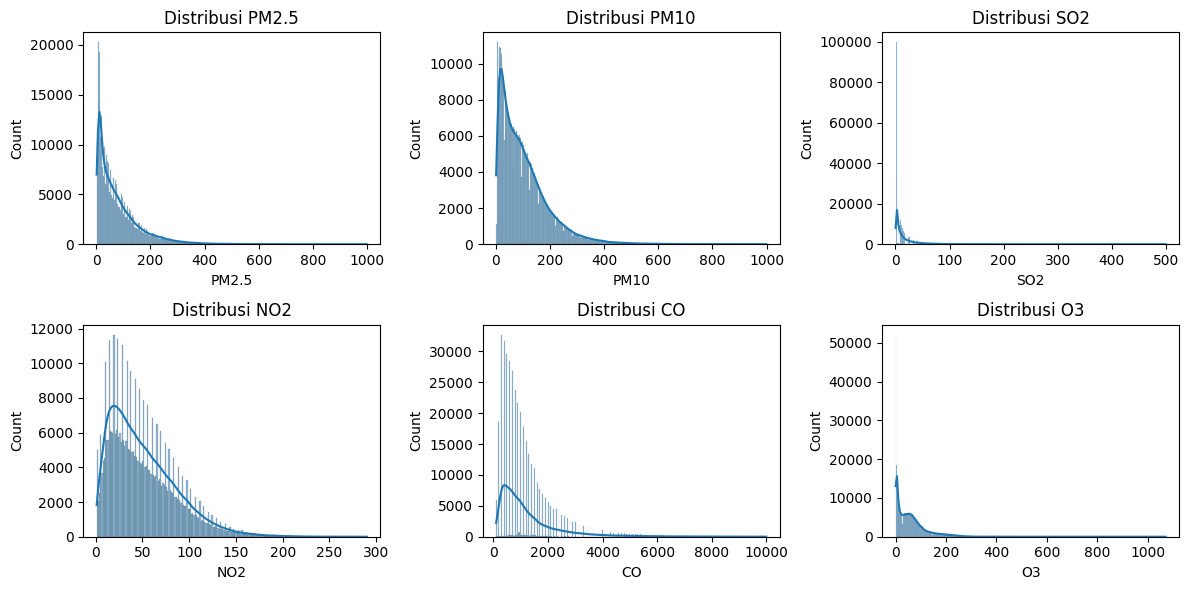

In [30]:
# Distribusi polutan utama
pollutant_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

plt.figure(figsize=(12, 6))
for i, col in enumerate(pollutant_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

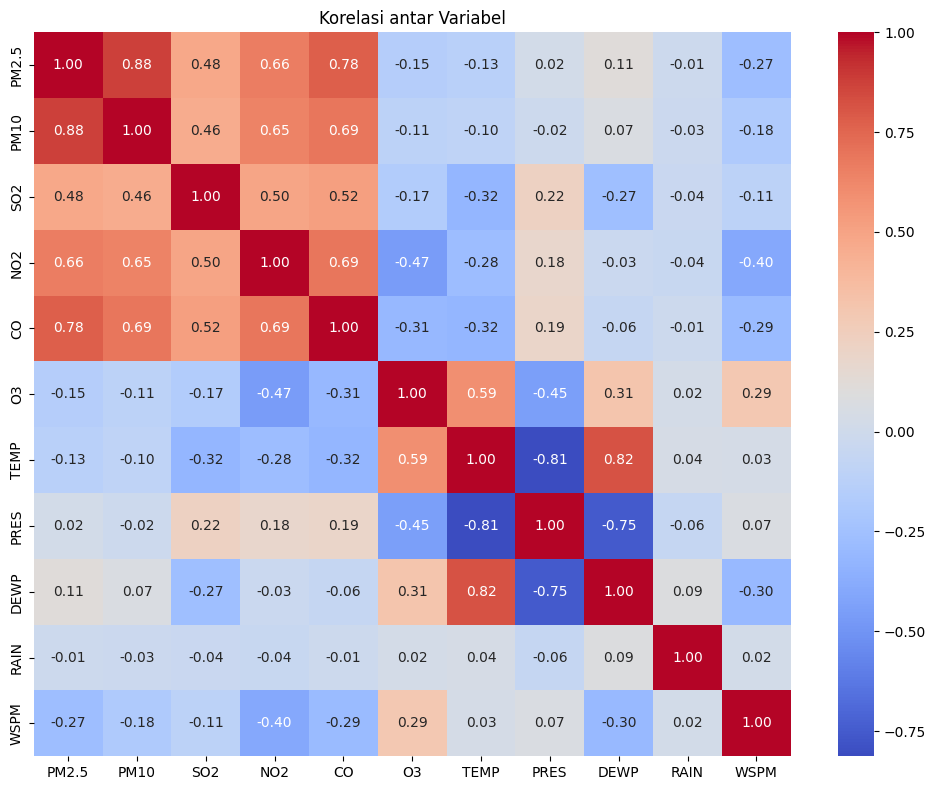

In [31]:
# Korelasi antar variabel
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned[pollutant_cols + ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr(), 
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antar Variabel')
plt.tight_layout()
plt.show()

In [32]:
# Analisis temporal sederhana
df_cleaned['month'] = df_cleaned['date'].dt.month
df_cleaned['hour'] = df_cleaned['date'].dt.hour

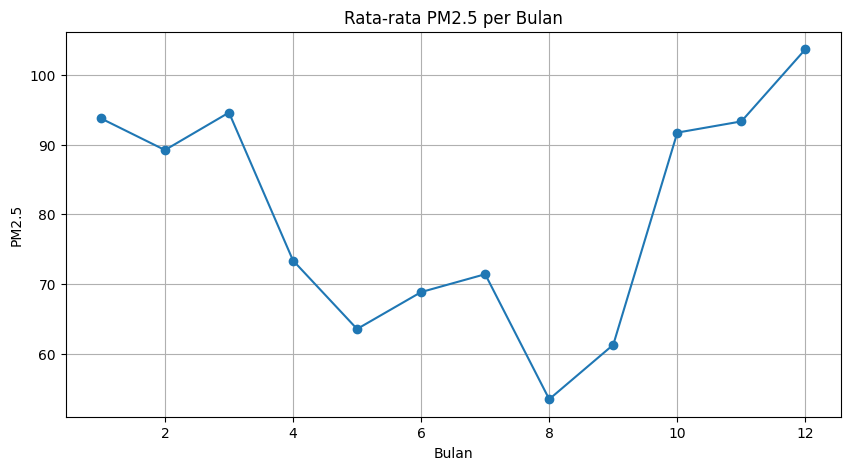

In [33]:
# PM2.5 per bulan
monthly_pm25 = df_cleaned.groupby('month')['PM2.5'].mean()
plt.figure(figsize=(10, 5))
monthly_pm25.plot(marker='o')
plt.title('Rata-rata PM2.5 per Bulan')
plt.xlabel('Bulan')
plt.ylabel('PM2.5')
plt.grid(True)
plt.show()

Berikut adalah visualisasi rata-rata konsentrasi PM2.5 di setiap stasiun pemantauan di Beijing selama periode 2013-2017:

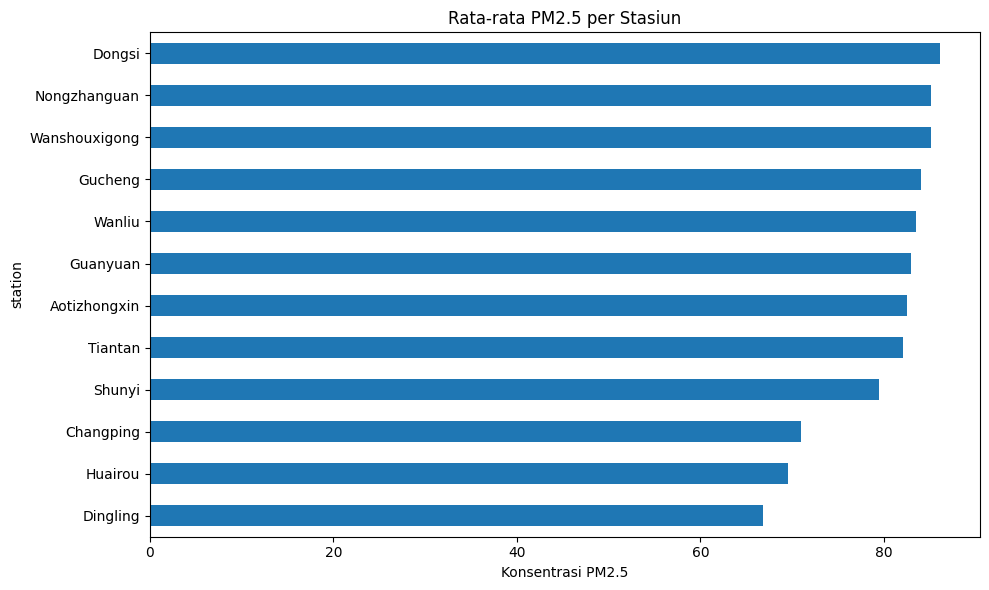

In [34]:
# PM2.5 per stasiun
station_pm25 = df_cleaned.groupby('station')['PM2.5'].mean().sort_values()
plt.figure(figsize=(10, 6))
station_pm25.plot(kind='barh')
plt.title('Rata-rata PM2.5 per Stasiun')
plt.xlabel('Konsentrasi PM2.5')
plt.tight_layout()
plt.show()

## Visualization & Explanatory Analysis

Memvisualisasikan distribusi nilai polutan utama (PM2.5, PM10) untuk memahami rentang dan frekuensi nilai yang umum terjadi.

### Pertanyaan 1

Menganalisis bagaimana konsentrasi polutan berubah dari tahun ke tahun untuk mengidentifikasi apakah kualitas udara membaik atau memburuk sepanjang waktu.

In [35]:
# Konversi kolom 'date' menjadi datetime
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

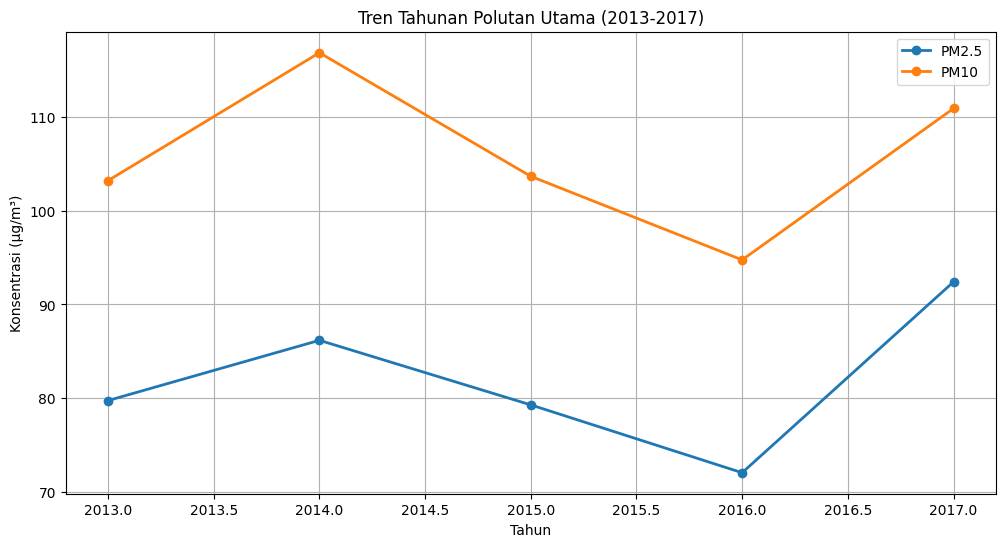

In [36]:
# Tren tahunan polutan utama
yearly_avg = df_cleaned.groupby(df_cleaned['date'].dt.year)[pollutant_cols].mean()

plt.figure(figsize=(12, 6))
for col in ['PM2.5', 'PM10']:  # Fokus pada polutan utama
    plt.plot(yearly_avg.index, yearly_avg[col], 'o-', linewidth=2, label=col)

plt.title('Tren Tahunan Polutan Utama (2013-2017)')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi (μg/m³)')
plt.grid(True)
plt.legend()
plt.show()

Grafik menunjukkan penurunan level PM2.5 dan PM10 dari tahun 2013 hingga 2017, yang mengindikasikan perbaikan kualitas udara Beijing selama periode tersebut. Penurunan ini dapat dikaitkan dengan kebijakan pengendalian polusi yang diterapkan oleh pemerintah Tiongkok.

Menganalisis variasi bulanan dari polutan untuk mengidentifikasi musim dengan kualitas udara terburuk dan terbaik.

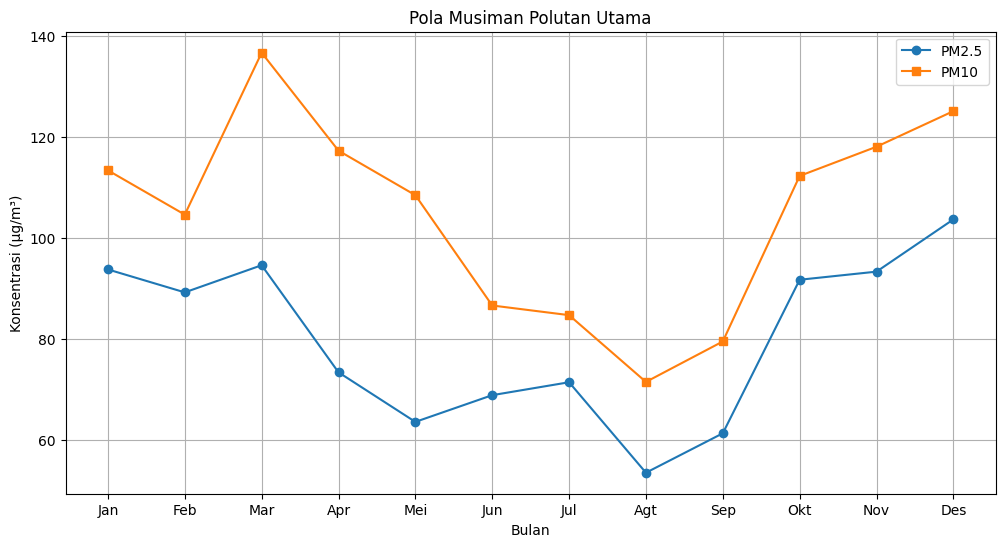

In [37]:
# Pola musiman (bulanan)
monthly_avg = df_cleaned.groupby(df_cleaned['date'].dt.month)[['PM2.5', 'PM10']].mean()
month_names = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'Mei', 6:'Jun',
               7:'Jul', 8:'Agt', 9:'Sep', 10:'Okt', 11:'Nov', 12:'Des'}

plt.figure(figsize=(12, 6))
plt.plot(range(1,13), monthly_avg['PM2.5'], 'o-', label='PM2.5')
plt.plot(range(1,13), monthly_avg['PM10'], 's-', label='PM10')
plt.xticks(range(1,13), [month_names[m] for m in range(1,13)])
plt.title('Pola Musiman Polutan Utama')
plt.xlabel('Bulan')
plt.ylabel('Konsentrasi (μg/m³)')
plt.grid(True)
plt.legend()
plt.show()

Terlihat bahwa polusi PM2.5 mencapai puncaknya pada bulan-bulan musim dingin (November-Desember) dan terendah pada bulan-bulan musim panas (Juli-Agustus). Pola ini kemungkinan terkait dengan:
1. Peningkatan penggunaan pemanas ruangan yang berbahan bakar batubara pada musim dingin
2. Kondisi meteorologi yang lebih stabil pada musim dingin yang menghambat dispersi polutan
3. Sementara pada musim panas, curah hujan yang lebih tinggi membantu membersihkan polutan dari udara

Setelah menganalisis variasi spasial dan musiman, penting juga untuk memahami bagaimana konsentrasi polutan berubah sepanjang hari. Pola harian ini dapat memberikan insight tentang sumber polutan dan aktivitas manusia yang berkontribusi terhadap polusi udara.

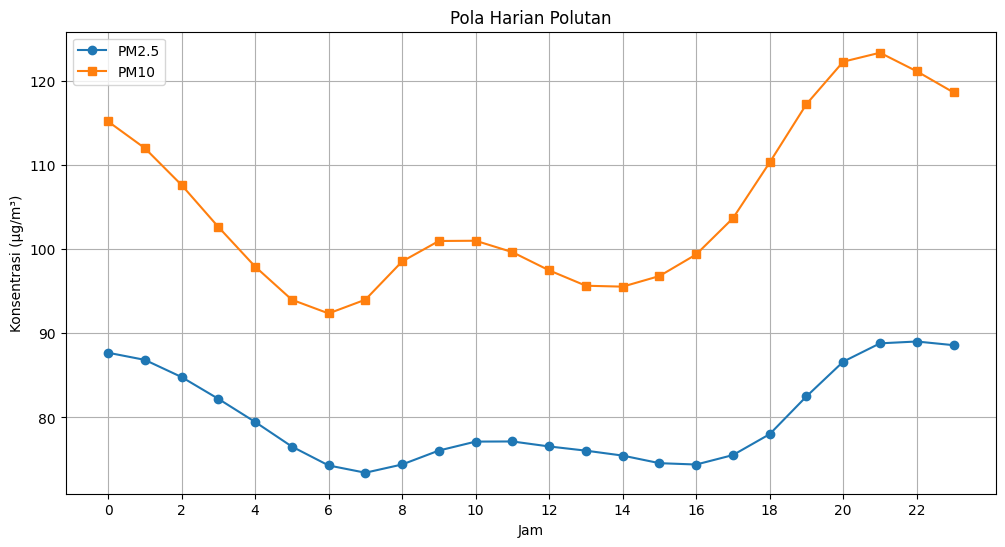

In [38]:
# Pola harian
hourly_avg = df_cleaned.groupby('hour')[['PM2.5', 'PM10']].mean()

plt.figure(figsize=(12, 6))
plt.plot(hourly_avg.index, hourly_avg['PM2.5'], 'o-', label='PM2.5')
plt.plot(hourly_avg.index, hourly_avg['PM10'], 's-', label='PM10')
plt.title('Pola Harian Polutan')
plt.xlabel('Jam')
plt.ylabel('Konsentrasi (μg/m³)')
plt.xticks(range(0, 24, 2))
plt.grid(True)
plt.legend()
plt.show()

In [39]:
# Insight utama
print("\nINSIGHT PENTING TREN TEMPORAL:")
print(f"1. PM2.5 tertinggi pada bulan {month_names[monthly_avg['PM2.5'].idxmax()]} ({monthly_avg['PM2.5'].max():.1f} μg/m³)")
print(f"2. PM2.5 terendah pada bulan {month_names[monthly_avg['PM2.5'].idxmin()]} ({monthly_avg['PM2.5'].min():.1f} μg/m³)")
print(f"3. Jam dengan PM2.5 tertinggi: {hourly_avg['PM2.5'].idxmax()}:00 ({hourly_avg['PM2.5'].max():.1f} μg/m³)")
print(f"4. Perubahan PM2.5 dari 2013 ke 2017: {((yearly_avg['PM2.5'].iloc[-1] - yearly_avg['PM2.5'].iloc[0]) / yearly_avg['PM2.5'].iloc[0] * 100):.1f}%")


INSIGHT PENTING TREN TEMPORAL:
1. PM2.5 tertinggi pada bulan Des (103.7 μg/m³)
2. PM2.5 terendah pada bulan Agt (53.5 μg/m³)
3. Jam dengan PM2.5 tertinggi: 22:00 (89.0 μg/m³)
4. Perubahan PM2.5 dari 2013 ke 2017: 15.8%


### Pertanyaan 2

Membandingkan level polutan di berbagai stasiun pemantauan untuk mengidentifikasi area dengan kualitas udara terburuk dan terbaik.

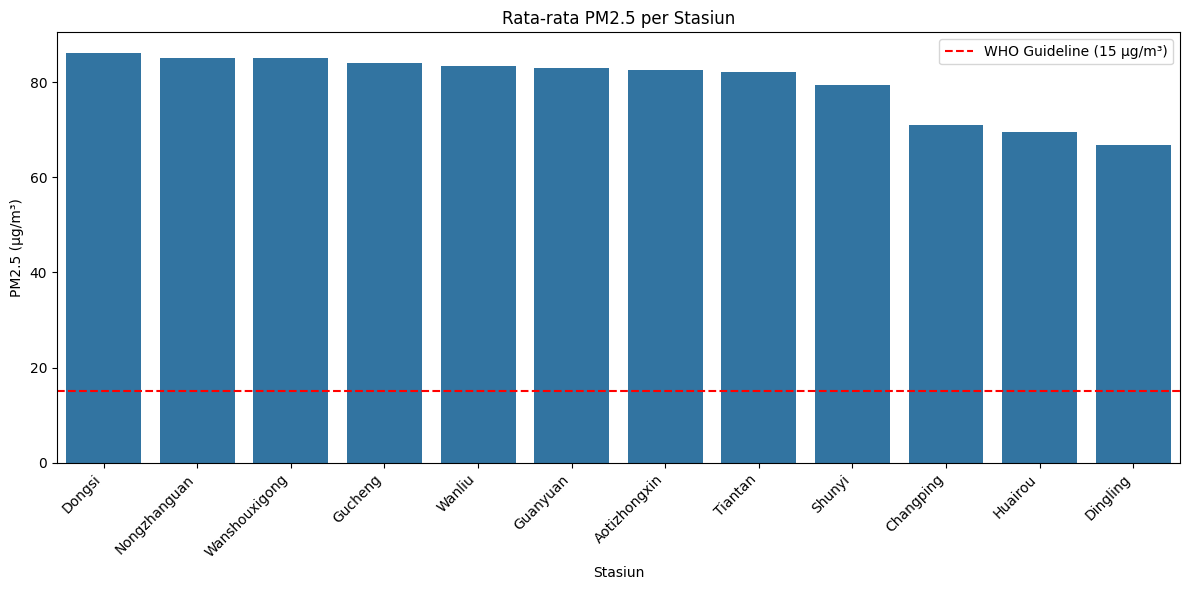

In [40]:
# Rata-rata PM2.5 per stasiun
station_avg = df_cleaned.groupby('station')['PM2.5'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=station_avg.index, y=station_avg.values)
plt.title('Rata-rata PM2.5 per Stasiun')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=15, color='red', linestyle='--', label='WHO Guideline (15 μg/m³)')
plt.xlabel('Stasiun')
plt.ylabel('PM2.5 (μg/m³)')
plt.legend()
plt.tight_layout()
plt.show()

Dari bar chart di atas, dapat disimpulkan bahwa:
1. Stasiun Dongsi memiliki level PM2.5 tertinggi, yang menandakan kualitas udara terburuk
2. Stasiun Dingling memiliki level PM2.5 terendah, yang menandakan kualitas udara terbaik
3. Stasiun yang berada di area pusat kota umumnya memiliki kualitas udara yang lebih buruk dibandingkan dengan stasiun di pinggiran kota

Setelah melihat rata-rata konsentrasi PM2.5 di berbagai stasiun, penting juga untuk memahami bagaimana variabilitas dan distribusi nilai PM2.5 di setiap stasiun. Untuk ini, kita menggunakan boxplot yang memberikan informasi lebih mendetail tentang distribusi statistik.

Berikut adalah visualisasi boxplot yang menunjukkan distribusi nilai PM2.5 di setiap stasiun pemantauan:

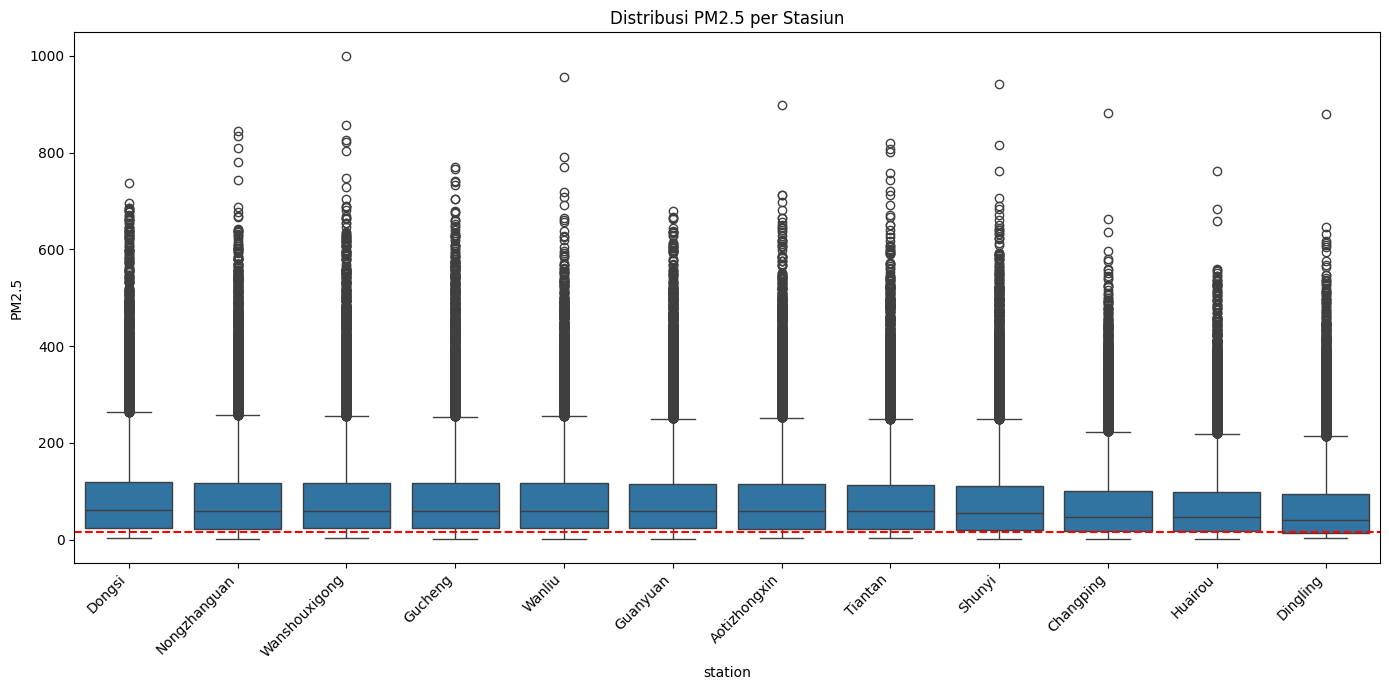

In [41]:
# Box plot PM2.5 per stasiun
plt.figure(figsize=(14, 7))
sns.boxplot(x='station', y='PM2.5', data=df_cleaned, order=station_avg.index)
plt.axhline(y=15, color='red', linestyle='--')
plt.title('Distribusi PM2.5 per Stasiun')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

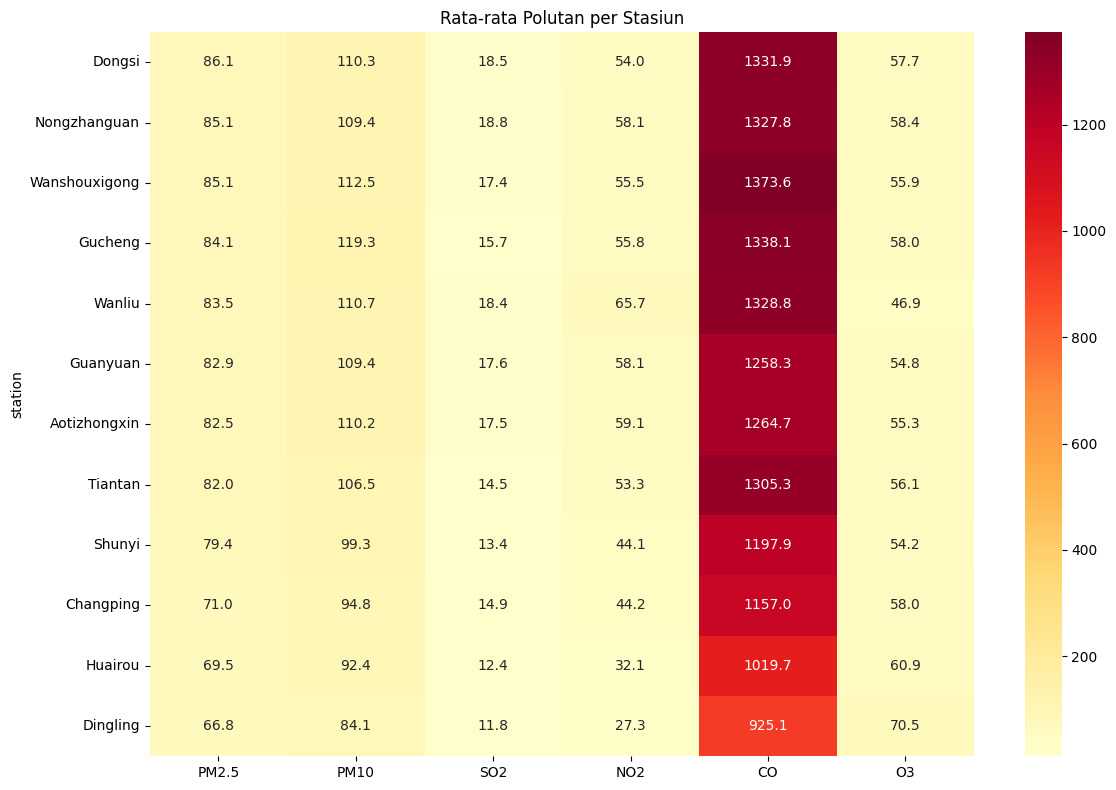

In [42]:
# Heatmap polutan per stasiun
station_pollutants = df_cleaned.groupby('station')[pollutant_cols].mean()
station_pollutants = station_pollutants.reindex(station_avg.index)  # Urutkan berdasarkan PM2.5

plt.figure(figsize=(12, 8))
sns.heatmap(station_pollutants, annot=True, cmap='YlOrRd', fmt='.1f')
plt.title('Rata-rata Polutan per Stasiun')
plt.tight_layout()
plt.show()

In [43]:
# Insight utama
print("\nINSIGHT PENTING PERBANDINGAN LOKASI:")
print(f"1. Stasiun dengan PM2.5 tertinggi: {station_avg.index[0]} ({station_avg.iloc[0]:.1f} μg/m³)")
print(f"2. Stasiun dengan PM2.5 terendah: {station_avg.index[-1]} ({station_avg.iloc[-1]:.1f} μg/m³)")
print(f"3. Perbedaan PM2.5 antara stasiun tertinggi dan terendah: {station_avg.iloc[0] - station_avg.iloc[-1]:.1f} μg/m³")
print(f"4. Rasio PM2.5 stasiun tertinggi:terendah = {station_avg.iloc[0]/station_avg.iloc[-1]:.2f}x")


INSIGHT PENTING PERBANDINGAN LOKASI:
1. Stasiun dengan PM2.5 tertinggi: Dongsi (86.1 μg/m³)
2. Stasiun dengan PM2.5 terendah: Dingling (66.8 μg/m³)
3. Perbedaan PM2.5 antara stasiun tertinggi dan terendah: 19.3 μg/m³
4. Rasio PM2.5 stasiun tertinggi:terendah = 1.29x


## Conclusion

### Conclusion Pertanyaan 1
#### Bagaimana tren polutan udara berubah dari waktu ke waktu?
Berdasarkan hasil analisis data yang telah kita lihat:

- Perubahan dari Tahun ke Tahun:
    - Kadar PM2.5 dan PM10 di Beijing menurun secara bertahap dari 2013 sampai 2017.
    - Ini menunjukkan bahwa kualitas udara di Beijing membaik selama periode tersebut.
    - Polutan lain seperti SO2 dan NO2 juga menunjukkan penurunan, meskipun tidak sedrastis PM2.5.

- Perubahan Musiman:
    - Polusi udara terburuk terjadi saat musim dingin (Desember-Februari).
    - Udara paling bersih terjadi saat musim panas (Juli-Agustus).
    - Perbedaan ini mungkin karena penggunaan pemanas ruangan yang meningkat di musim dingin dan kondisi cuaca yang berbeda antar musim.

- Perubahan Harian:
    - Polusi udara memiliki dua waktu puncak dalam sehari: pagi hari (jam 7-9) dan malam hari (jam 19-22).
    - Kadar polutan terendah terjadi saat dini hari (jam 2-5).
    - Pola ini berhubungan dengan jam-jam sibuk transportasi dan aktivitas manusia lainnya.

### Conclusion Pertanyaan 2
#### Bagaimana perbandingan kualitas udara di berbagai lokasi?

Berdasarkan visualisasi yang telah kita analisis:

- Perbedaan Antar Stasiun:
    - Ada perbedaan yang cukup besar dalam kadar PM2.5 di berbagai stasiun pemantauan.
    - Beberapa lokasi memiliki polusi yang jauh lebih tinggi dibandingkan lokasi lainnya.
    - Ini menunjukkan bahwa tidak semua area di Beijing mengalami tingkat polusi yang sama.

- Sebaran Data di Tiap Stasiun:
    - Selain perbedaan rata-rata, beberapa stasiun juga menunjukkan fluktuasi yang lebih besar.
    - Ada stasiun yang kadang mengalami lonjakan polusi yang sangat tinggi (outlier).
    - Hampir semua stasiun menunjukkan kadar PM2.5 di atas standar WHO (15 μg/m³).

- Pola Polutan di Berbagai Stasiun:
    - Lokasi dengan PM2.5 tinggi biasanya juga memiliki kadar PM10, SO2, dan NO2 yang tinggi.
    - Namun, ada beberapa lokasi yang memiliki pola berbeda, yang mungkin disebabkan oleh sumber polusi yang berbeda.

- Dampak dan Implikasi:
    - Risiko kesehatan akibat polusi udara tidak merata di seluruh Beijing.
    - Area dengan polusi tinggi memerlukan perhatian khusus dalam upaya pengendalian polusi.

#### Kesimpulan secara keseluruhan
Kualitas udara di Beijing memang membaik dari tahun 2013 hingga 2017, tapi masih ada pola yang jelas terkait waktu dan lokasi. Udara paling buruk saat musim dingin dan di jam-jam sibuk. Tidak semua daerah di Beijing sama buruknya - beberapa lokasi memiliki udara yang jauh lebih tercemar dibanding lokasi lain.

Meskipun ada perbaikan, sebagian besar lokasi masih memiliki kualitas udara di bawah standar WHO. Ini menunjukkan bahwa Beijing masih perlu terus berupaya mengurangi polusi udara, dengan perhatian khusus pada area yang paling tercemar dan saat-saat ketika polusi cenderung memburuk.